In [2]:
import nbsetup
import numpy as np
import ensemblepy as ep
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from simulations.graphs.models import ERGraph

In [13]:
ENSEMBLES = 50

In [24]:
def series(nodes, q=0.0, ensembles=ENSEMBLES):
    x = np.linspace(0, 1, 51)
    y = []
    eds = []
    # generate data
    for p in x:
        #nbsetup.cp(p)
        graphs = [ERGraph(nodes, p, q) for _ in range(ensembles)]
        data = [g.edges_counts() for g in graphs]
        ed = ep.Discrete(data, ep.binint(0,nodes))#ep.binobs(data))
        eds.append(ed)
        comp = ed.comparison()
        comp['x'] = p
        comp['pooled'] = ed.measures['pooled']
        for i, e in enumerate(ed.measures['entropies']):
            comp['e-%s' % i] = e
        y.append(comp)
        if p > 0.45 and p < 0.55:
            print(p, ed.incoherence)
    
    return x,y

        
def plot(serieses, nodes=100, ensembles=ENSEMBLES, ylims=((None, None), (None, None))):
    f, ax = plt.subplots(len(serieses), 2, figsize=(8,7), sharex=True)
    plt.tight_layout()
    
    for i, (title, q) in enumerate(serieses):
        
        x, y = series(nodes, q, ensembles=ensembles)
        data = pd.DataFrame(y)
        
        # top
        top = sns.lineplot(data=data, x='x', y='incoherence', ax=ax[0][i], label='Incoherence', color='purple', legend=i==0)
        sns.lineplot(data=data, x='x', y='jsd', ax=ax[0][i], label='Jensen-Shannon Divergence', color='red', linestyle='dashed', legend=i==0)
        top.set(ylabel=None, title="%s ERGraph q=%s" % (title, q), ylim=(0, ylims[i][0]))
        
        
        # bottom
        for e in range(min(ensembles, 10)):
            sns.lineplot(data=data, x='x', y='e-%s' % e, ax=ax[1][i], label='Entropies of a individial trials' if e==0 else None, color='skyblue', linestyle='dotted', legend=i==0)
        bottom = sns.lineplot(data=data, x='x', y='pooled', ax=ax[1][i], label='Entropy of pooled distribution', color='orange', legend=i==0)
        bottom.set(ylabel=None, xlabel="ER p-value (probability of connection)", ylim=(0, ylims[i][1]))
                
    return f

0.5 0.01784432225950854
0.5 0.2379588386612204


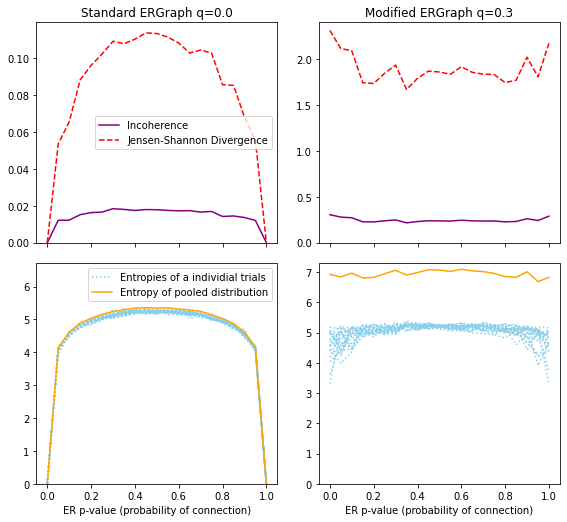

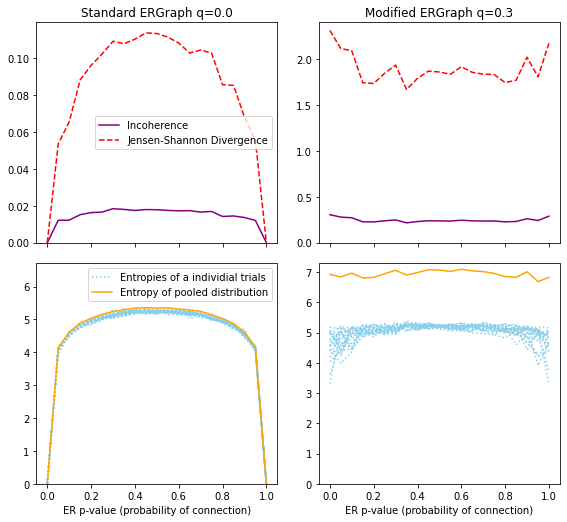

In [11]:
plot([['Standard', 0.0], ['Modified', 0.3]], nodes=400, ylims=((None, 6.7),(2.4,None)))#.savefig('figures/ergraph.eps')

0.5 0.019310491710669883
0.5 0.23459096912111713


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


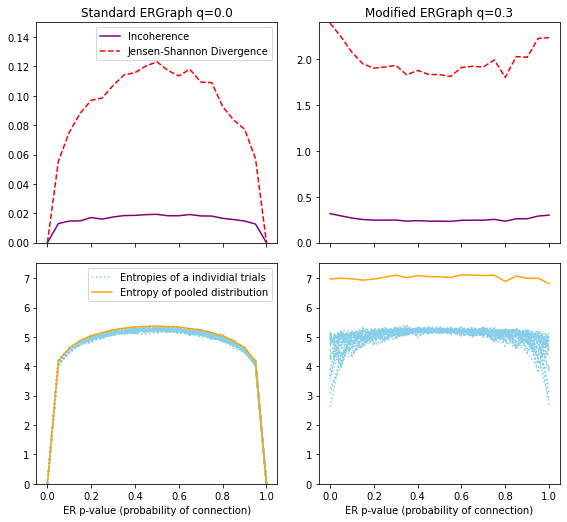

In [15]:
plot([['Standard', 0.0], ['Modified', 0.3]], nodes=400, ylims=((0.15, 7.5),(2.4,7.5))).savefig('figures/ergraph.eps')

0.46 0.07260001778218203
0.48 0.07052577431917849
0.5 0.07105764765885689
0.52 0.07163992212218354
0.54 0.07069932909214785
0.46 0.28267124291443346
0.48 0.27657074827467454
0.5 0.2848018913251066
0.52 0.275277728493937
0.54 0.2770600143395617


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


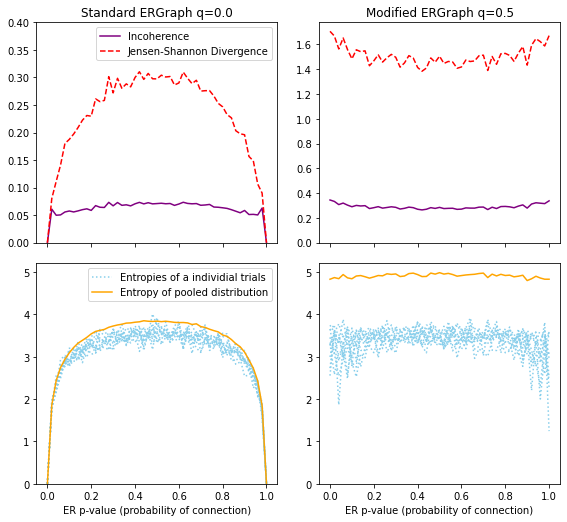

In [25]:
fifty = plot([['Standard', 0.0], ['Modified', 0.5]], nodes=50, ensembles=100, ylims=((0.4, 5.2),(None,5.2))).savefig('figures/ergraph.eps')

# Balancing disorder

Erdos-Renyi Graphs are good examples of how a system approaches disorder. Where initially the start with high order (i.e. _p=0_ where p is the probability that a node will connect with another node, so highly ordered as they're all entirely disconnected).

When _p=0.5_ this is where the system is most disordered. However, what we see below is although the system is most disordered in this state, therefore has the highest entropy, the ergodic complexity in this case remains low. As all ensembles have the same high entropy, there's no interesting structure there.

In [ ]:
hundred = series(100)

Interestingly though, there is a much higher complexity seen with fewer nodes.

In [ ]:
ten = series(15)

## Figures for paper

In [ ]:
if False:
    hundred.plot().savefig('figures/4.1-er-hundred.eps')